<a href="https://colab.research.google.com/github/Jinyong-20/Machine_Learning_Programming/blob/master/finalpaper/mlp_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **손금으로 풀어보는 나의 운명**

*-Team A-*

 : 김지나, 성주희, 최진용

*한 학기 동안 수고 많으셨습니다. 모델 설명을 부족할때 좀 있었지만 데이터 준비를 꼼꼼하게 했네요.앞으로 학습 결과 해석하면 만족할 것 같습니다. 데이터 준비하고 모델도 학습 시키면 결과를 해석 안 하면 의미가 없기 때문이다.*

[92/100]

#목적



손금 중 가장 진한 3선(감정선, 두뇌선, 생명선)의 장단을 읽는 모델 만들기
데이터 수집: 이벤트를 통하여 카카오톡 및 메일로 손바닥 사진을 받는 방식으로 데이터를 수집하였다.

손바닥 사진을 보면 목표로 하는 세 손금에 붉은색 선이 그어져있다. 이는 최초 훈련시 선을 긋지 않고 시도하였을 때 정확도가 매우 낮았기 때문이다. 따라서 원활한 Line-Detecting을 위해 직접 모든 손바닥 사진에 대하여 목표 손금에 선을 그었다.


*손바닥 이미지 데이터셋을 얼마나 큰지 얘기 해야 함. 머신 러닝 쓸때 보통 데이터를 많이 써야 되는데요. 데이터 많이 사용하지 않으면 왜 그랬었는지 설명 필요함.*

*그리고 line-detecting을 왜 하는지 얘기해야 함. 손바닥의 선을 읽으며 목표가 무엇인가...*

#학습계획

1. 데이터 수집 

2. 손금에 붉은 선 그리기

3. 각 손금에 대해 길이에 따라서 두가지로 분류(길다-1, 짧다-0)

	즉, 하나의 손바닥 사진에 대하여 감정선, 두뇌선, 생명선 중 긴 것들만 라벨이 붙게 됨

4. 엑셀로 작성하여 csv파일로 내보내어 사용

5. Resnet50을 활용하여 훈련

#학습 과정 및 코드


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 17.1MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change " 에러를 방지하기 위한 버전 변경

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai import *

드라이브에 마운트, 필요한 함수와 모듈 임포트

In [ ]:
path = Path(root_dir + 'palmhand/')
print(path)
path.ls()

/content/gdrive/My Drive/palmhand


[PosixPath('/content/gdrive/My Drive/palmhand/palm1'),
 PosixPath('/content/gdrive/My Drive/palmhand/palm2'),
 PosixPath('/content/gdrive/My Drive/palmhand/palm3'),
 PosixPath('/content/gdrive/My Drive/palmhand/palm4'),
 PosixPath('/content/gdrive/My Drive/palmhand/instapalm#손바닥'),
 PosixPath('/content/gdrive/My Drive/palmhand/지인들 손바닥'),
 PosixPath('/content/gdrive/My Drive/palmhand/지나 이벤트 폴더'),
 PosixPath('/content/gdrive/My Drive/palmhand/확장자 변경했어요'),
 PosixPath('/content/gdrive/My Drive/palmhand/이름 변경완료'),
 PosixPath('/content/gdrive/My Drive/palmhand/왼손반전'),
 PosixPath('/content/gdrive/My Drive/palmhand/이름 변경 완료(최종0'),
 PosixPath('/content/gdrive/My Drive/palmhand/칼같은 선긋기'),
 PosixPath('/content/gdrive/My Drive/palmhand/이름 175~261'),
 PosixPath('/content/gdrive/My Drive/palmhand/finalData'),
 PosixPath('/content/gdrive/My Drive/palmhand/data.csv'),
 PosixPath('/content/gdrive/My Drive/palmhand/data.gs

드라이브에 있는 라벨링 csv파일과 이미지 파일의 경로로 Path생성

In [ ]:
df = pd.read_csv(path/'data.csv')
df.head()

,filename,lifeLine,intellectLine,emotionLine
0,R (1),0,0,0
1,R (2),0,1,1
2,R (3),0,1,0
3,R (4),0,1,1
4,R (5),1,1,0


csv의 데이터를 dataFrame으로 표현

In [ ]:
a = df.columns
a = list(a [1:len(a)])
a
import pandas as pd
df_re = df['filename']
dff = DataFrame()
for i in range(len(df)) :
  txt = ""
  for j in range(3) :
    if df.iloc[i][a[j]] == 1 :
      if txt == "" :
        txt = txt + str(a[j])
      else :
        txt = txt + " " + str(a[j])
  dff = pd.concat([dff, DataFrame([txt])], axis = 0)

dff = dff.reset_index()
df_re = pd.concat([df_re, dff], axis = 1)
df_re.drop(['index'], axis='columns', inplace=True)
df_re.columns =  ['filename', 'tag']


csv의 데이터를 받아온 df에서, 목표로 하는 학습에 맞추어 데이터 프레임의 형태를 변환함

이때 tag 라벨링은 멀티 라벨링을 위해 " "(띄어쓰기)로 구별되어야 함.

이를 위해 파이썬의 pandas 모듈을 사용, 데이터의 값에 따라 columns의 명으로 새로이 데이터 프레임 작성



In [ ]:
df_re

,filename,tag
0,R (1),
1,R (2),intellectLine emotionLine
2,R (3),intellectLine
3,R (4),intellectLine emotionLine
4,R (5),lifeLine intellectLine
...,...,...
256,R (257),lifeLine
257,R (258),intellectLine
258,R (259),lifeLine
259,R (260),lifeLine intellectLine


수정된 데이터 프레임 출력

In [ ]:
tfms = get_transforms(do_flip = False, max_lighting=0.1, max_warp=0.)

transfrom설정, 오른손만 사용해야하기 때문에 뒤집기는 허용하지 않음. 


In [ ]:
np.random.seed(42)
src = (ImageList.from_df(df_re, path, folder='finalData', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

데이터프레임에서 파일명, 멀티라벨링 기준을 받아와서 이미지리스트 생성, valid데이터로 0.2만큼 할당

*valid데이터는 왜 0.2로 했는지 ? 다른 split으로 혹시 해 보면 어떤 결과가 나올건가요 ?*

In [ ]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

이미지리스트에서 이미지데이터번치 생성

*데이터를 왜 normalize 하는 건가요 ? imagenet_stats 왜 쓰는 건가요 ?*

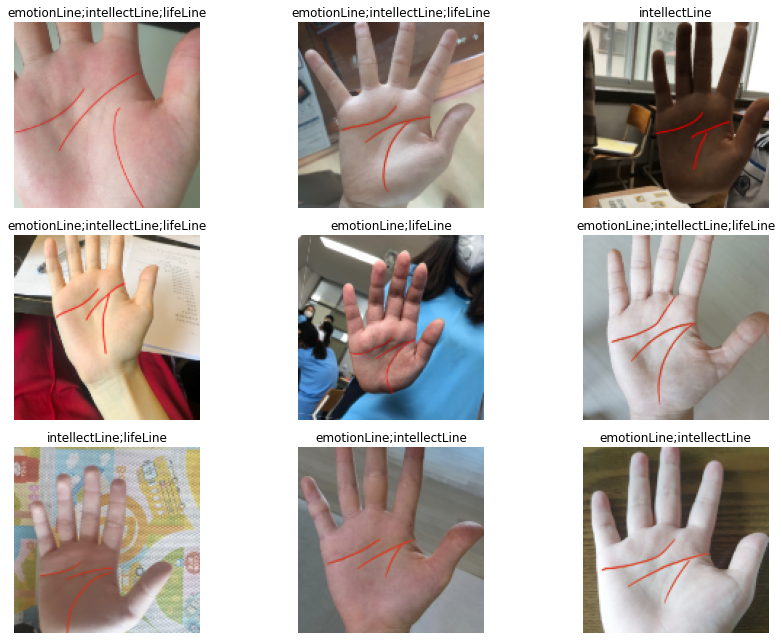

In [ ]:
data.show_batch(rows=3, figsize=(12,9))


이미지 데이터 보여주기

In [ ]:
arch = models.resnet50

resnet50의 model을 가져와서 learner를 만드는데 쓰도록 하겠다.

*resnet50 모델은 어떻게 선택하게 됐어요 ? resnet50 모델 특정은 무엇인가요 ? line-detecting 문제 풀고 싶으면 어떤 모델이 좋아요?*

In [ ]:
len(data.classes)

3

In [ ]:
data.classes

['emotionLine', 'intellectLine', 'lifeLine']

3개의 가능한 label들이 있다.
이 label들은 앞서 csv에 존재하던 생명선, 감정선, 두뇌선이다.

In [ ]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

fbeta는 metrics의 일종이다. Kaggle은 F score이라는 특정 metric에 대해 내 모델이 평가되는데 이 F score은 여러 종류가 있다. Planet의 경우, competition rules를 보면 F2를 따른다고 되어있다. 그리고 fbeta의 디폴트 값이 2이다. 그러므로 그대로 써준다.

accuracy_thresh 함수는 모든 확률을 threshold와 비교해서, thresh보다 높은 모든 케이스를 반환하는 식으로 정확도를 비교한다.

partial로 thresh가 항상 0.2인 accuracy_thresh함수를 acc_02라는 새로운 함수로 정의했다. fbeta도 같은 식이다.

*여기 보통 쓰는 accuracy metrics과 만든 metrics의 효과를 설명 더 필요함. threshold은 왜 0.2로 ?*

**이부분이 multi label이 붙어있을때와 하나의 label만 붙어있을 때의 가장 큰 차이점이다. 우리는 이전과는 달리 17개의 label에서 단 하나만이 아닌 n개를 목표로 하고 있기 때문에 서로 비교하는 것은 의미가 없다. 그래서 이번엔 threshold를 지정해준다. 그리고 만약에 해당 label일 가능성이 threshold보다 높으면 해당 label 또한 맞다고 판단할 것이다. 즉! 가장 높은 것이 아닌, 기준보다 높은 것들이다.**


익숙한 cnn_learner로 learn에 learner를 지정하고,

*cnn_learner 왜 쓰는건가 ?*

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


좋은 learning rate를 찾은 뒤,

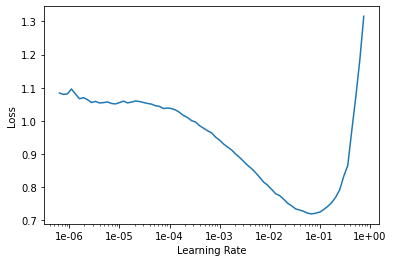

In [ ]:
learn.recorder.plot()

*이 그래프 보면 뭐를 배울 수 있냐, lr=0.01 왜 선택했는냐*

In [ ]:
lr = 0.01

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(30, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,1.023509,1.121099,0.557692,0.640430,00:27
1,0.928228,1.029711,0.641026,0.761197,00:25
2,0.846276,0.988632,0.608974,0.728064,00:25
3,0.753772,1.839558,0.506410,0.532612,00:24
4,0.695540,1.826373,0.589744,0.646507,00:24
5,0.619013,1.665182,0.653846,0.733601,00:25
6,0.561954,2.583828,0.589744,0.671926,00:24
7,0.508127,3.455098,0.615385,0.658179,00:25
8,0.466026,3.439618,0.557692,0.644374,00:24
9,0.432687,2.313812,0.660256,0.720100,00:24


training을 해준다. 정확도가 점점 올라간 모습을 볼 수 있다.

*epochs=30 왜 ? train_loss 좋아졌는데 valid_loss 1보다 넢고 좋아지지 않았는데 의미가 있겠죠 ? accuracy_thresh과 fbeta 보면 뭐를 해석할 수 있어요 ?*

In [ ]:
learn.save('stage-1-rn50')

구한 값들을 저장해둔다.

...And fine-tune the whole model:

In [ ]:
learn.unfreeze()

unfreeze하고,

*왜 ? unfreeze 하면 어떤 일이 발생하는건가 ?*

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


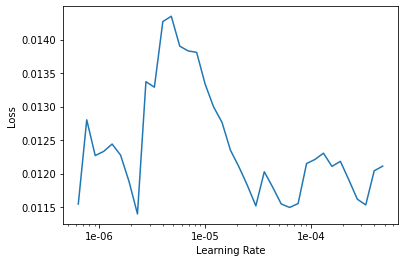

In [ ]:
learn.lr_find()
learn.recorder.plot()

마찬가지로 적절한 learning rate를 찾아 보여준다.

*그래프 보니까 learning rate은 많이 불안스럽네요*

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.008188,1.323599,0.685897,0.768941,00:25
1,0.006152,1.432833,0.679487,0.768788,00:25
2,0.005041,1.501264,0.705128,0.790155,00:25
3,0.005225,1.573722,0.698718,0.776960,00:24
4,0.005498,1.585502,0.692308,0.773755,00:25


수정된 결과이다.

*결과 해석 부족. valid_loss 아직 1보다 높은데...accuracy_thresh과 fbeta가 좋은건가 ?*

In [ ]:
learn.save('stage-2-rn50')

이번 단계도 저장한다.

In [ ]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

이번엔 새로운 DataBunch를 만든다. 여기서부터와 위의 차이점은 size이다(128에서 256으로). 그런데 왜 새로 만드느냐! 계속 반복하면 Overfitting이 일어나기 때문에 general이 아닌 specific한 것만 구분할 수 있기 때문이다. learner는 유지해둬도 되지만, DataBunch는 새로 만들어야만 한다.

*이미지 사이즈 드 크게 하면 결과가 어떻게 다를 것 같에요 ?*

In [ ]:
learn.freeze()

아까 풀은걸 다시 freeze해주고,

*learner은 freeze 할때 어떤 일이 발생하는건가 ?*

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


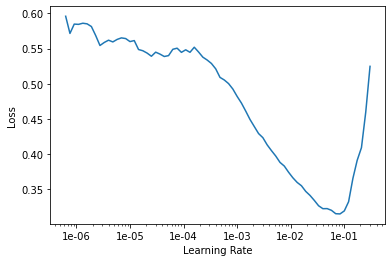

In [ ]:
learn.lr_find()
learn.recorder.plot()

좋은 learning rate를 찾아서 fitting 해준다.

In [ ]:
lr=1e-2/2

In [ ]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.564439,1.103098,0.679487,0.770841,00:35
1,0.448980,1.022644,0.660256,0.773546,00:31
2,0.381728,1.014613,0.653846,0.760184,00:31
3,0.321281,1.046169,0.653846,0.753621,00:30
4,0.282066,1.073514,0.634615,0.737970,00:31


*이번에 epochs=5 왜요 ? slice 어떻게 설정했는지 ? 예전 보다 결과가 좋아졌는지 해석 부족*

In [ ]:
learn.save('stage-1-256-rn50')

이 단계를 저장해두고,

In [ ]:
learn.unfreeze()

learner를 다시 unfreeze해서 model을 수정한다.

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.154306,1.086700,0.666667,0.756577,00:31
1,0.143205,1.186667,0.647436,0.701898,00:31
2,0.124784,1.182667,0.660256,0.716410,00:32
3,0.103584,1.169992,0.653846,0.711901,00:31
4,0.090623,1.147296,0.660256,0.726788,00:31


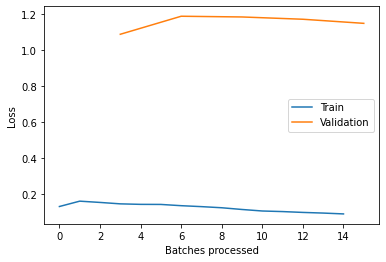

In [ ]:
learn.recorder.plot_losses()

거의다 훈련시켜갈 수록 train의 loss도 줄어들었고, validation도 거의 비슷하게 많이 줄어들었다.

이런 결과가 나왔다. validation이 train보다 높으므로 좋다.

*validation이 train보다 높으므로 좋다 --> 그 이유는 ?*

In [ ]:
learn.save('stage-2-256-rn50')

In [ ]:
learn.export()

우리가 찾은 값들을 추출해서 저장한다!

*그 다음은 모델은 classification을 잘 하는지 확인해야 돼죠. test 데이터를 가지고 label 예측해 보면 결과 맞는지 보여 줘야 됨.*